<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Website_Traffic_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv')
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [4]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


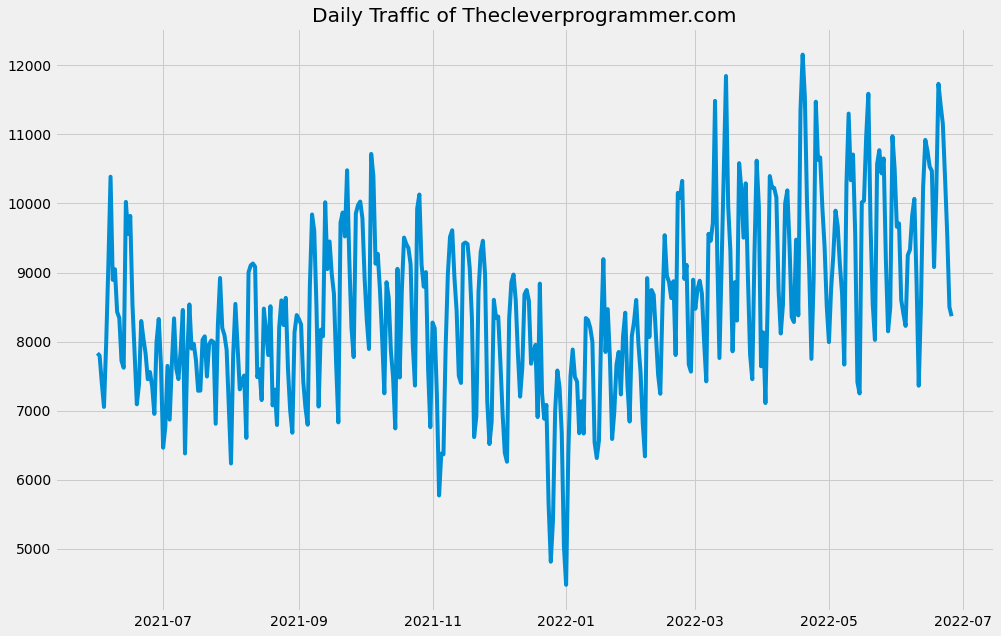

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data['Date'], data['Views'])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

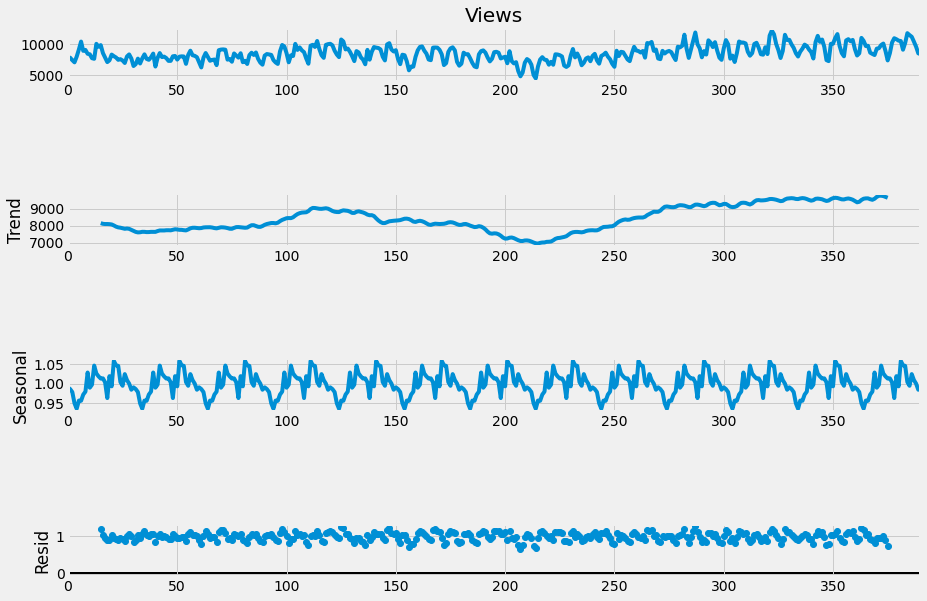

In [7]:
result = seasonal_decompose(data["Views"],
                            model = 'multiplicative',
                            freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

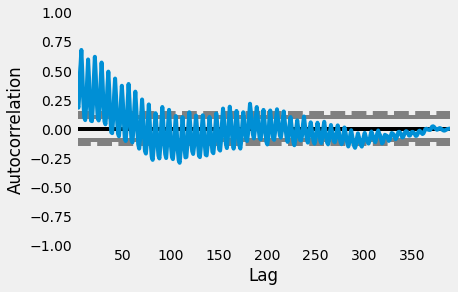

In [8]:
pd.plotting.autocorrelation_plot(data["Views"])

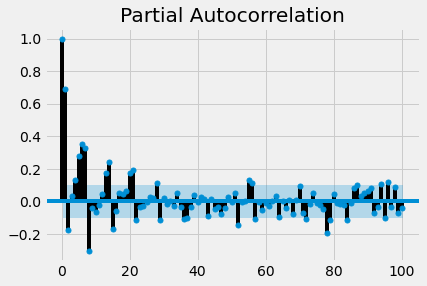

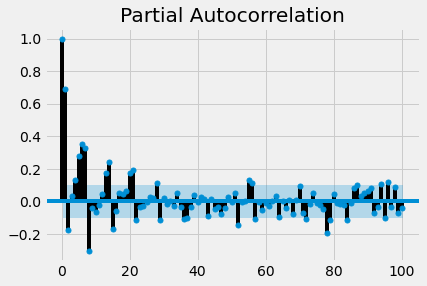

In [10]:
plot_pacf(data["Views"], lags = 100)

In [12]:
p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                 order = (p,d,q),
                                 seasonal_order=(p, d, q, 12))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.396
Date:                            Thu, 27 Oct 2022   AIC                           6228.791
Time:                                    12:22:20   BIC                           6287.815
Sample:                                         0   HQIC                          6252.217
                                            - 391                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7852      0.132      5.932      0.000       0.526       1.045
ar.L2         -0.7880      0.135     -5.854      0.000      -1.052      -0.524
ar.L3         -0.1498      0.169     -0.884      0.377      -0.482       0.182
ar.L4         -0.1793      0.152     -1.183      0.237      -0.476       0.118
ar.L5         -0.1469      0.137     -1.069      0.285      -0.416       0.123
ma.L1         -1.1880      0.092    -12.879      0.000      -1.369      -1.007
ma.L2          0.8889      0.077     11.527      0.000       0.738       1.040
ar.S.L12      -0.2406      3.779     -0.064      0.949      -7.648       7.167
ar.S.L24       0.0540      0.637      0.085      0.932      -1.195       1.303
ar.S.L36      -0.1890      0.231     -0.818      0.413      -0.642       0.264
ar.S.L48      -0.2104      0.807     -0.261      0.794      -1.792       1.371
ar.S.L60       0.0233      0.821      0.028      0.977      -1.586       1.633
ma.S.L12      -0.6958      3.783     -0.184      0.854      -8.110       6.719
ma.S.L24      -0.0922      2.946     -0.031      0.975      -5.866       5.682
sigma2      1.257e+06   1.59e+05      7.913      0.000    9.45e+05    1.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.98   Prob(JB):                         0.53
Heteroskedasticity (H):               1.04   Skew:                             0.14
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.74e+14. Standard errors may be unstable.
"""

In [13]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9860.127528
392    10775.106240
393    10764.201016
394     9862.038057
395     8753.270861
396     8211.402010
397     8919.689638
398     9680.691155
399    10253.265797
400    10632.036224
401     9857.115724
402     9354.548619
403     9028.186539
404     9066.153982
405    10537.869466
406    10998.439826
407    10899.217638
408    10096.329237
409     9449.172761
410     8618.418506
411     9167.413250
412    10387.108414
413    10585.055261
414    10776.147133
415    10251.908249
416     9447.652924
417     9024.224618
418     9137.424848
419     9859.332931
420    10205.620876
421    10707.478336
422     9899.835319
423     9535.775904
424     9046.887793
425     8790.239221
426    10104.619884
427    10819.088783
428    10899.990843
429    10415.935153
430     9445.427133
431     8674.263360
432     8698.195510
433    10033.399333
434    10488.043392
435    10830.664563
436    10491.143865
437     9334.585436
438     9150.552190
439     9320.132447
440    10266.551631


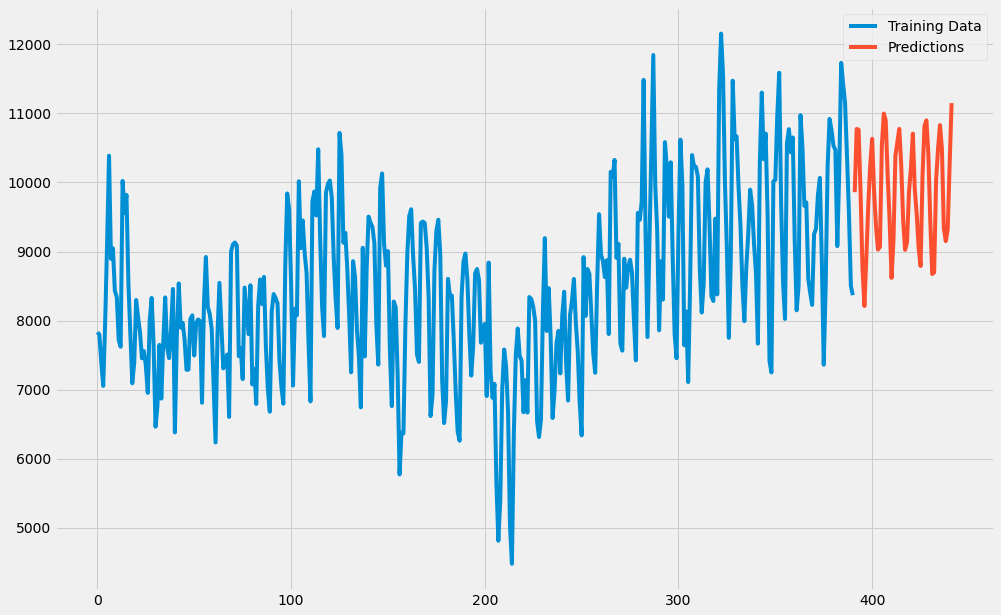

In [14]:
data['Views'].plot(legend=True, label="Training Data",
                   figsize=(15,10))
predictions.plot(legend=True, label="Predictions")